In [56]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: >

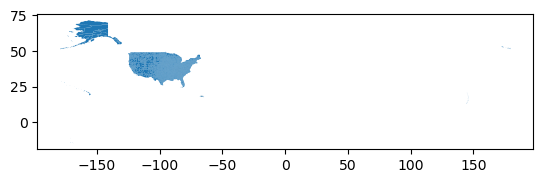

In [57]:
counties = gpd.read_file("/Users/mehmetbagdinli/Desktop/assignment5/tl_2025_us_county/tl_2025_us_county.shp")
counties.plot()

In [58]:
data = pd.read_csv("/Users/mehmetbagdinli/Desktop/assignment5/nhgis0001_ds267_20235_county.csv")
print(data.columns)

Index(['GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATE', 'STATEA',
       'COUNTY', 'COUNTYA', 'COUSUBA',
       ...
       'ASPSM010', 'ASPSM011', 'ASPSM012', 'ASPSM013', 'ASPSM014', 'ASPSM015',
       'ASPSM016', 'ASPSM017', 'ASPSM018', 'ASPSM019'],
      dtype='object', length=414)


In [59]:
counties["TL_GEO_ID"] = counties["GEOID"].astype(int)

<Axes: >

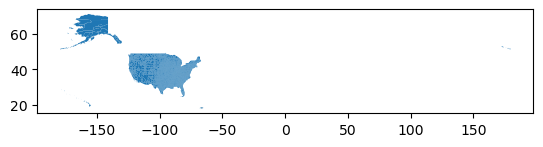

In [60]:
merged_data = counties.merge(data, on="TL_GEO_ID")
merged_data.plot()


Hocam indirdiğim veri setinde alaska verileri de olduğu için böyle bir görünüm elde etti onları çıkartmak için chat gpt'den yardım aldım


In [61]:
merged_data_f = merged_data[~merged_data["STATEFP"].isin(["02","15","60","66","69","72","78"])]

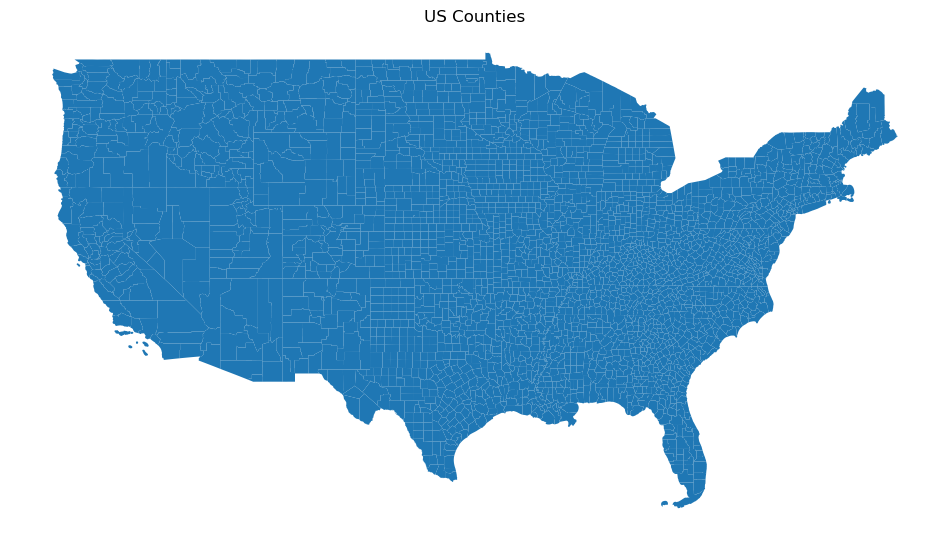

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data_f.plot(ax=ax)
ax.set_title("US Counties")
ax.set_axis_off()
plt.show()

In [63]:
from libpysal.weights import Queen, Rook, KNN

In [64]:
#queen
w_queen = Queen.from_shapefile("/Users/mehmetbagdinli/Desktop/assignment5/tl_2025_us_county/tl_2025_us_county.shp")
w_queen.transform = 'r'
w_queen

#rook
w_rook = Rook.from_shapefile("/Users/mehmetbagdinli/Desktop/assignment5/tl_2025_us_county/tl_2025_us_county.shp")
w_rook.transform = 'r'
w_rook

#knn=3 iken
w_knn3 = KNN.from_shapefile("/Users/mehmetbagdinli/Desktop/assignment5/tl_2025_us_county/tl_2025_us_county.shp", 3)
w_knn3.transform = 'r'
w_knn3

/opt/anaconda3/lib/python3.13/site-packages/libpysal/io/iohandlers/pyShpIO.py:247: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices)
/opt/anaconda3/lib/python3.13/site-packages/libpysal/cg/shapes.py:1408: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = [Ring(vertices)]
/opt/anaconda3/lib/python3.13/site-packages/libpysal/io/iohandlers/pyShpIO.py:232: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices, holes)
/opt/anaconda3/lib/python3.13/site-packages/libpysal/cg/shapes.py:1405: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = list(map(Ring, vertices))
/opt/anaconda3/lib/python3.13/site-packages/libpysal/cg/shapes.py:1412: FutureWarning:

('WARNING: ', 343, ' is an island (no neighbors)')
('WARNING: ', 449, ' is an island (no neighbors)')
('WARNING: ', 489, ' is an island (no neighbors)')
('WARNING: ', 934, ' is an island (no neighbors)')
('WARNING: ', 1445, ' is an island (no neighbors)')
('WARNING: ', 1721, ' is an island (no neighbors)')
('WARNING: ', 2013, ' is an island (no neighbors)')
('WARNING: ', 2339, ' is an island (no neighbors)')
('WARNING: ', 2826, ' is an island (no neighbors)')
('WARNING: ', 3214, ' is an island (no neighbors)')


/opt/anaconda3/lib/python3.13/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 10 islands with ids: 343, 449, 489, 934, 1445, 1721, 2013, 2339, 2826, 3214.
  W.__init__(self, neighbors, ids=ids, **kw)
/opt/anaconda3/lib/python3.13/site-packages/libpysal/cg/shapes.py:1279: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._centroid = Point((cx, cy))


('WARNING: ', 343, ' is an island (no neighbors)')
('WARNING: ', 449, ' is an island (no neighbors)')
('WARNING: ', 489, ' is an island (no neighbors)')
('WARNING: ', 934, ' is an island (no neighbors)')
('WARNING: ', 1445, ' is an island (no neighbors)')
('WARNING: ', 1721, ' is an island (no neighbors)')
('WARNING: ', 2013, ' is an island (no neighbors)')
('WARNING: ', 2339, ' is an island (no neighbors)')
('WARNING: ', 2826, ' is an island (no neighbors)')
('WARNING: ', 3214, ' is an island (no neighbors)')


/opt/anaconda3/lib/python3.13/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [65]:
w_queen.neighbors[32]

[2945, 419, 2404, 1285, 2309, 684, 255]

In [67]:
w_rook.neighbors[32]

[2945, 419, 2404, 1285, 2309, 684]

In [68]:
w_knn3.neighbors[32]

[np.int64(2404), np.int64(684), np.int64(419)]

In [69]:
import libpysal

#queen ağarlıklandırmasını seçersek
wq = libpysal.weights.Queen.from_dataframe(merged_data_f)
wq.transform = 'r'


/var/folders/fq/hry5knqn05n0lrcxpj8fdw_r0000gn/T/ipykernel_48218/3314757962.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(merged_data_f)


In [70]:
x = merged_data_f["ASN1E001"] #toplam nüfusa bakıyorux burda
x = x - x.mean()
Wx = libpysal.weights.lag_spatial(wq, x)


In [71]:
moran_I = (x * Wx).sum() / (x * x).sum()
moran_I

np.float64(0.36119541937568655)

In [72]:
#mantıken toplan nufüsun mekansal olarak autocorrelationa sahip olduğunu bulduk

OLS

In [73]:
import spreg

In [74]:
cols_needed = [
    "ASN1E001",   # popülasyon
    "ALAND",      # land area
    "ASNRE001",   # median age 
    "ASN2E001",   # race toplam
    "ASN2E002",   # white alone
    "ASOTE001",   # travel time to work total
    "ASOTE011", "ASOTE012", "ASOTE013",  # 45-59, 60-89, 90+ minutes gruplar halinde
    "ASOWE001",   # household type 
    "ASOWE002"    # family households
]
for c in cols_needed:
    merged_data_f[c] = pd.to_numeric(merged_data[c], errors="coerce")
#hocam bazı sütunlar string geldiiği için böyle bir dönüşüm yaptık



/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [75]:
#hocam veri çekmede çok zorlandım o sebeple çekebildiklerimle random bi OLS yapacağız anlamsız da çıksa ya da mantığa oturmasa da
merged_data_f["pop_density"] = merged_data_f["ASN1E001"] / merged_data_f["ALAND"]


/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [76]:
merged_data_f["log_pop_density"] = np.log(merged_data_f["pop_density"])

merged_data_f["share_white"] = merged_data_f["ASN2E002"] / merged_data_f["ASN2E001"]

merged_data_f["share_long_commute"] = ((merged_data_f["ASOTE011"] + merged_data_f["ASOTE012"] + merged_data_f["ASOTE013"]) / merged_data_f["ASOTE001"])
merged_data_f["share_family_hh"] = merged_data_f["ASOWE002"] / merged_data_f["ASOWE001"]

/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [77]:
y = merged_data_f["log_pop_density"].values
x_OLS = merged_data_f[["ASNRE001", "share_white", "share_long_commute", "share_family_hh"]].values

In [78]:
model_OLS = spreg.OLS(
    y,
    x_OLS,
    w=wq,
    spat_diag=True,
    name_x=["median_age", "share_white", "share_long_commute", "share_family_hh"],
    name_y="log_pop_density"
)

print(model_OLS.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :log_pop_density                Number of Observations:        3109
Mean dependent var  :    -10.9494                Number of Variables   :           5
S.D. dependent var  :      1.7658                Degrees of Freedom    :        3104
R-squared           :      0.1364
Adjusted R-squared  :      0.1352
Sum squared residual:     8369.61                F-statistic           :    122.5229
Sigma-square        :       2.696                Prob(F-statistic)     :   3.279e-97
S.E. of regression  :       1.642                Log likelihood        :   -5950.911
Sigma-square ML     :       2.692                Akaike info criterion :   11911.821
S.E of regression ML:      1.6407                Schwarz criterion     :   11942.031

---------------------------------------------------------

Hocam modelin açıklayıcılık gücü çok zayıf ama log_pop_density=nüfus yoğunluğunun log’unun median_age arttıkça yoğunluk azalıyor, share_white yükseldikçe yoğunluk azalıyor , share_long_commute arttıkça yoğunluk artıyor  ve share_family_hh arttıkça yoğunluk azalıyor ve bunların hepsi istatistiksel olarak anlamlı. mekânsal bağımlılığın çok güçlü olması (LM lag/error ve robust testlerin hepsi p≈0), yani OLS artıklarında komşuluk ilişkilerinden kaynaklı sistematik yapı kaldığı için sonuçlar “başlangıç” olarak okunmalı ve daha uygun bir son model için SAR/SEM/SDM gibi mekânsal regresyonlara geçilmesi gerekir.

/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

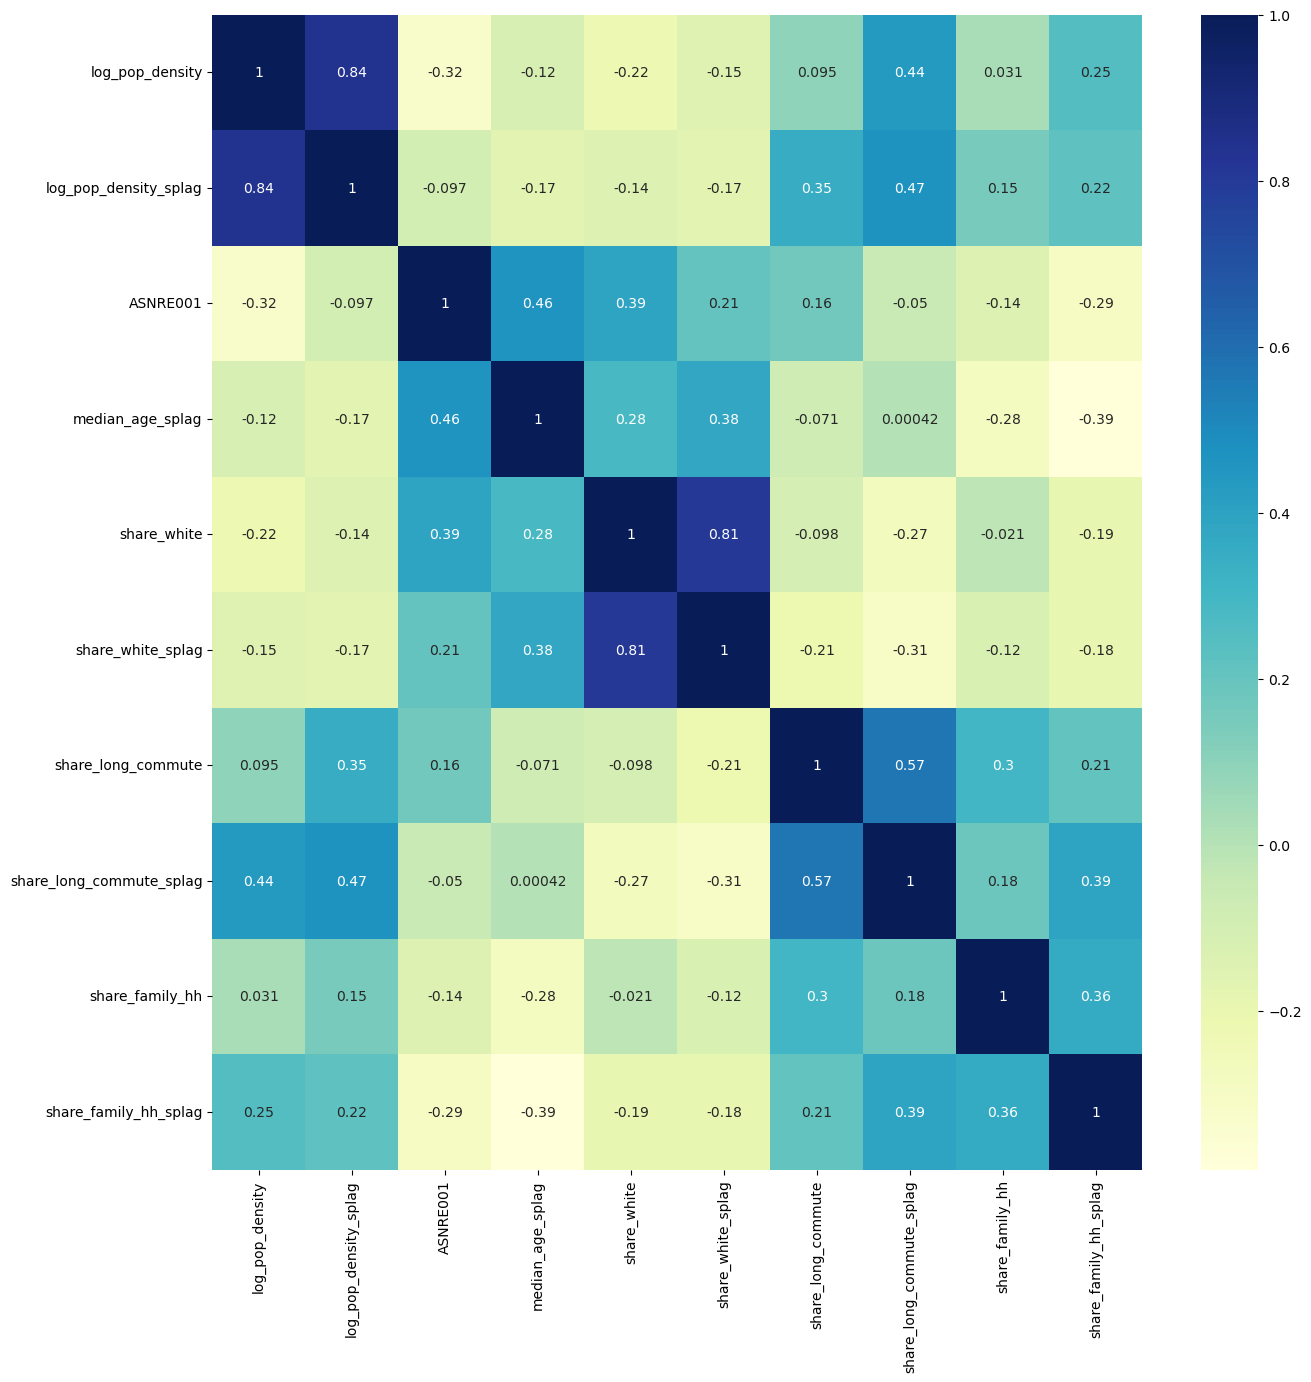

In [79]:
import libpysal
import seaborn as sns



merged_data_f['log_pop_density_splag'] = libpysal.weights.lag_spatial(wq, merged_data_f['log_pop_density'])
merged_data_f['median_age_splag'] = libpysal.weights.lag_spatial(wq, merged_data_f['ASNRE001'])
merged_data_f['share_white_splag'] = libpysal.weights.lag_spatial(wq, merged_data_f['share_white'])
merged_data_f['share_long_commute_splag'] = libpysal.weights.lag_spatial(wq, merged_data_f['share_long_commute'])
merged_data_f['share_family_hh_splag'] = libpysal.weights.lag_spatial(wq, merged_data_f['share_family_hh'])

fig = plt.subplots(figsize=(15, 15))
sns.heatmap(
    merged_data_f[
        [
            'log_pop_density', 'log_pop_density_splag',
            'ASNRE001', 'median_age_splag',
            'share_white', 'share_white_splag',
            'share_long_commute', 'share_long_commute_splag',
            'share_family_hh', 'share_family_hh_splag'
        ]
    ].corr(),
    cmap="YlGnBu",
    annot=True
)
plt.show()